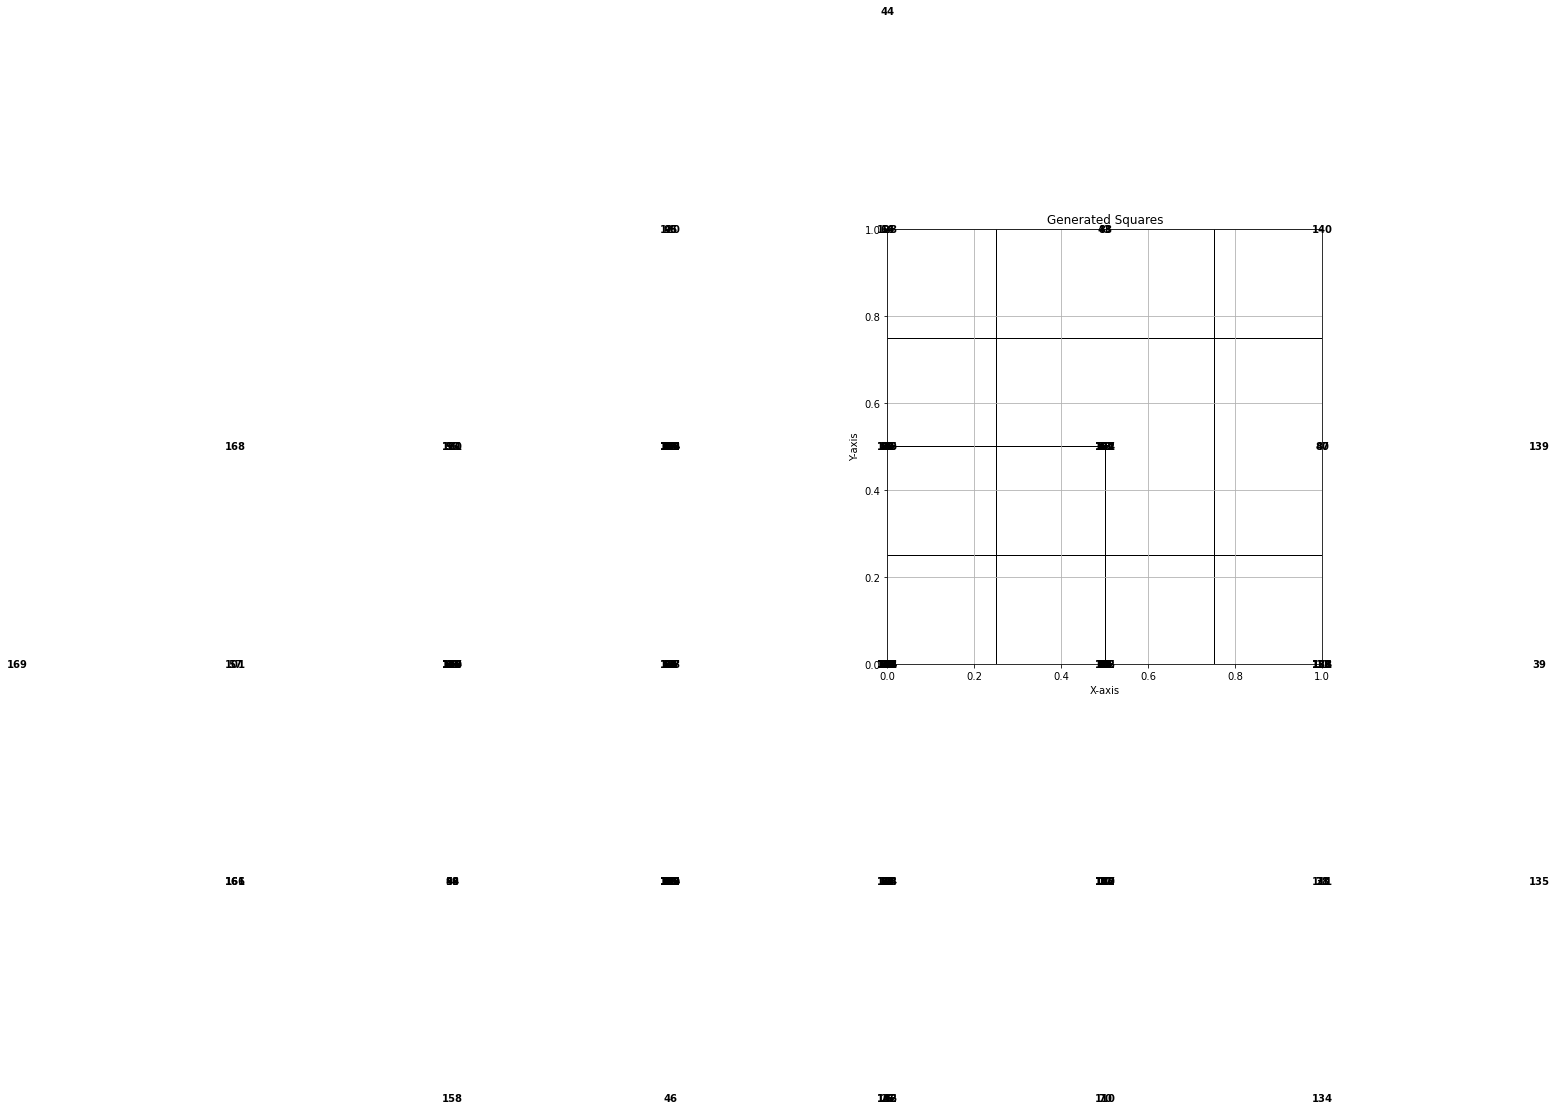

In [23]:
import random
import matplotlib.pyplot as plt

def generate_square(probability):
    return random.random() < probability

def generate_squares(generations, probability):
    squares = []
    for generation in range(generations):
        new_squares = []

        for square in squares:
            if generate_square(probability):
                new_squares.append((square[0], square[1] - 0.5, 0.5))
                new_squares.append((square[0] + 0.5, square[1], 0.5))
                new_squares.append((square[0], square[1] + 0.5, 0.5))
                new_squares.append((square[0] - 0.5, square[1], 0.5))
        
        squares.extend(new_squares)

        if generation == 0:
            squares.append((0, 0, 1))  # Initial square with side length of 1

    return squares

def plot_squares(squares):
    plt.figure(figsize=(8, 8))
    for i, square in enumerate(squares):
        plt.Rectangle((square[0] - square[2] / 2, square[1] - square[2] / 2), square[2], square[2], edgecolor='black', linewidth=1, fill=False)
        plt.gca().add_patch(plt.Rectangle((square[0] - square[2] / 2, square[1] - square[2] / 2), square[2], square[2], edgecolor='black', linewidth=1, fill=False))
        plt.text(square[0], square[1], str(i + 1), ha='center', va='center', fontsize=10, fontweight='bold')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Generated Squares')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    generations = 5
    probability = 0.5  # Set the desired probability for generating new squares
    squares = generate_squares(generations, probability)
    plot_squares(squares)


In [44]:
import random
from PIL import Image

class DungeonGenerator:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.room_width = 8  # Fixed room width
        self.room_height = 6  # Fixed room height
        self.map = [[' ' for _ in range(width)] for _ in range(height)]
        self.rooms = []

    def create_room(self, x, y):
        for i in range(x, x + self.room_width):
            for j in range(y, y + self.room_height):
                if i == x or i == x + self.room_width - 1 or j == y or j == y + self.room_height - 1:
                    self.map[j][i] = '#'
                else:
                    self.map[j][i] = '.'

    def create_corridor(self, start_x, start_y, end_x, end_y):
        x, y = start_x, start_y
        while x != end_x:
            self.map[y][x] = '#'
            if x < end_x:
                x += 1
            else:
                x -= 1
        while y != end_y:
            self.map[y][x] = '#'
            if y < end_y:
                y += 1
            else:
                y -= 1

    def generate_dungeon(self, num_rooms):
        for _ in range(num_rooms):
            x = random.randint(1, self.width - self.room_width - 1)
            y = random.randint(1, self.height - self.room_height - 1)
            self.create_room(x, y)
            self.rooms.append((x, y))

        for i in range(len(self.rooms) - 1):
            x1, y1 = self.rooms[i]
            x2, y2 = self.rooms[i + 1]
            self.create_corridor(x1 + self.room_width // 2, y1 + self.room_height // 2, x2 + self.room_width // 2, y2 + self.room_height // 2)

    def print_map(self):
        for row in self.map:
            print(''.join(row))

def save_dungeon_as_image(dungeon, output_path):
    symbol_colors = {
        ' ': (255, 255, 255),  # White space
        '.': (100, 100, 100),  # Floor (gray)
        '#': (0, 0, 0)         # Wall (black)
    }

    image = Image.new('RGB', (dungeon.width, dungeon.height))

    for y in range(dungeon.height):
        for x in range(dungeon.width):
            symbol = dungeon.map[y][x]
            color = symbol_colors[symbol]
            image.putpixel((x, y), color)

    image.save(output_path)

if __name__ == "__main__":
    width = 60
    height = 60
    num_rooms = 10

    dungeon = DungeonGenerator(width, height)
    dungeon.generate_dungeon(num_rooms)

    output_image_path = "dungeon_output.png"
    dungeon.print_map()  # Optional: Print the dungeon layout in the console
    save_dungeon_as_image(dungeon, output_image_path)


                                                            
                                                            
                                                            
                                                            
                                                            
                                                            
                                                            
                                                            
                       ########                             
          ########     #......#                             
          #......#     #......#       ########              
          #...##############..#       #......#              
          #...####     #...#..#       #......#              
          #.....##     ####################..#  ########    
          ########                    #...#..#  #......#    
                #                     ########  #......#    
            ########    

In [1]:
import random

class DungeonMap:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.map_data = [['#'] * width for _ in range(height)]

    def __str__(self):
        return '\n'.join(''.join(row) for row in self.map_data)

    def add_room(self, x, y, room_width, room_height):
        for i in range(y, y + room_height):
            for j in range(x, x + room_width):
                self.map_data[i][j] = '.'

    def add_corridor(self, x1, y1, x2, y2):
        while x1 != x2 or y1 != y2:
            if x1 < x2:
                x1 += 1
            elif x1 > x2:
                x1 -= 1
            elif y1 < y2:
                y1 += 1
            elif y1 > y2:
                y1 -= 1
            self.map_data[y1][x1] = '.'

    def add_door(self, x, y):
        self.map_data[y][x] = 'D'

    def generate(self):
        # Randomly place entrance and exit
        entrance_x, entrance_y = random.randint(1, self.width - 2), random.randint(1, self.height - 2)
        exit_x, exit_y = random.randint(1, self.width - 2), random.randint(1, self.height - 2)

        self.add_room(entrance_x, entrance_y, 1, 1)
        self.add_room(exit_x, exit_y, 1, 1)

        # Generate additional rooms and corridors
        num_rooms = random.randint(4, 8)
        for _ in range(num_rooms):
            room_width, room_height = random.randint(3, 6), random.randint(3, 6)
            room_x, room_y = random.randint(1, self.width - room_width - 1), random.randint(1, self.height - room_height - 1)
            self.add_room(room_x, room_y, room_width, room_height)

            door_x, door_y = random.randint(room_x, room_x + room_width - 1), random.randint(room_y, room_y + room_height - 1)
            self.add_door(door_x, door_y)

        # Connect rooms with corridors
        for _ in range(num_rooms // 2):
            room1_x, room1_y = random.randint(1, self.width - 1), random.randint(1, self.height - 1)
            room2_x, room2_y = random.randint(1, self.width - 1), random.randint(1, self.height - 1)
            self.add_corridor(room1_x, room1_y, room2_x, room2_y)

        # Place entrance and exit
        self.map_data[entrance_y][entrance_x] = 'E'
        self.map_data[exit_y][exit_x] = 'X'

if __name__ == "__main__":
    width, height = 15, 10
    dungeon = DungeonMap(width, height)
    dungeon.generate()
    print(dungeon)


###############
####.#.....####
####.......####
#####....X..E.#
##D........####
##.....D...####
##.........####
##.........####
##......#######
###############


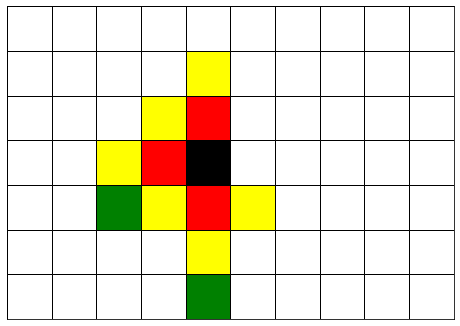

In [284]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def add_black_box(grid):
    x = 4
    y = 3
    if 0 <= x < len(grid[0]) and 0 <= y < len(grid):
        grid[y][x] = "black"
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]

        create_level_2(neighbors)
        
def create_level_2(neighbors) :
    num_cells = random.randint(1, 4)  # Generate 1 to 3 cells at level 1 wall
    for _ in range(num_cells):
        nx, ny = random.choice(neighbors)
        if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid) and grid[ny][nx] == 'white':
            grid[ny][nx] = "red"
            neighbors3 =   [(nx-1, ny), (nx+1, ny), (nx, ny-1), (nx, ny+1)]
            create_level_3(neighbors3)
        

def create_level_3(neighbor) :
    num_cells = random.randint(2, 4)  # Generate 1 to 3 cells at level 1 wall
    for _ in range(num_cells):
        nx, ny = random.choice(neighbor)
        if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid) and grid[ny][nx] == 'white':
            grid[ny][nx] = "yellow"
            neighbors4 =   [(nx-1, ny), (nx+1, ny), (nx, ny-1), (nx, ny+1)]
            create_level_4(neighbors4)

def create_level_4(neighbor) :
    num_cells = random.randint(2, 3)  # Generate 1 to 3 cells at level 1 wall
    for _ in range(num_cells):
        nx, ny = random.choice(neighbor)
        if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid) and grid[ny][nx] == 'white':
            grid[ny][nx] = "blue"
            neighbors4 =   [(nx-1, ny), (nx+1, ny), (nx, ny-1), (nx, ny+1)]
            create_level_3(neighbors4)

def create_level_4(neighbor) :
    num_cells = 1  # Generate 1 to 3 cells at level 1 wall
    for _ in range(num_cells):
        nx, ny = random.choice(neighbor)
        if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid) and grid[ny][nx] == 'white':
            grid[ny][nx] = "green"
            # neighbors4 =   [(nx-1, ny), (nx+1, ny), (nx, ny-1), (nx, ny+1)]
            # create_level_3(neighbors4)


def create_grid(width, height):
    return [['white' for _ in range(width)] for _ in range(height)]

def display_grid(grid):
    fig, ax = plt.subplots(figsize=(8, 8))
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            color = grid[y][x]
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

    ax.set_xticks(range(len(grid[0])+1), minor=False)
    ax.set_yticks(range(len(grid)+1), minor=False)
    ax.grid(which='minor', color='black', linewidth=2)
    ax.tick_params(which='both', length=0)

    ax.set_aspect('equal')  # Set the aspect ratio to 'equal' for uniform cell size

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

# Create a 32x16 grid
grid_width = 10
grid_height = 7
grid = create_grid(grid_width, grid_height)

# Add a black box at (3, 5) with level 2 neighbor generation
for i in range(3):
    add_black_box(grid)

# Display the grid
display_grid(grid)


In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def add_black_box(grid):
    total_room = 20
    room = []
    x = 4
    y = 3
    if 0 <= x < len(grid[0]) and 0 <= y < len(grid):
        room.append((y, x))

        temp_room = []
        neighbor_tuple = (x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)
        temp_room.extend(neighbor_tuple)

        while len(temp_room) < total_room:
            temp = random.choice(temp_room)  # Choose a random neighbor
            if temp in room:
                temp_room.remove(temp)  # Remove the neighbor if it's already in the room
            elif random.random() < 0.5:  # 50% chance of adding the neighbor to the room
                temp_room.remove(temp)  # Remove the neighbor if it's added to the room
            else:
                room.append(temp)  # Add the neighbor to the room

    return room




def create_grid(width, height):
    return [['white' for _ in range(width)] for _ in range(height)]

def display_grid(grid):
    fig, ax = plt.subplots(figsize=(8, 8))
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            color = grid[y][x]
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

    ax.set_xticks(range(len(grid[0])+1), minor=False)
    ax.set_yticks(range(len(grid)+1), minor=False)
    ax.grid(which='minor', color='black', linewidth=2)
    ax.tick_params(which='both', length=0)

    ax.set_aspect('equal')  # Set the aspect ratio to 'equal' for uniform cell size

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

# Create a 32x16 grid
grid_width = 8
grid_height = 9
grid = create_grid(grid_width, grid_height)

# Add a black box at (3, 5) with level 2 neighbor generation
for i in range(3):
    add_black_box(grid)

# Display the grid
display_grid(grid)


IndentationError: expected an indented block (Temp/ipykernel_11020/855501360.py, line 27)

[(3, 4), (3, 5), (3, 3), (2, 4), (2, 5), (4, 5), (3, 2), (3, 6), (3, 7), (4, 4), (5, 5), (4, 6), (2, 6), (2, 3)]
more room  [(3, 4), (3, 5), (3, 3), (2, 4), (2, 5), (4, 5), (3, 2), (3, 6), (3, 7), (4, 4), (5, 5), (4, 6), (2, 6), (2, 3)]
one room  [(3, 2), (3, 7), (5, 5)]


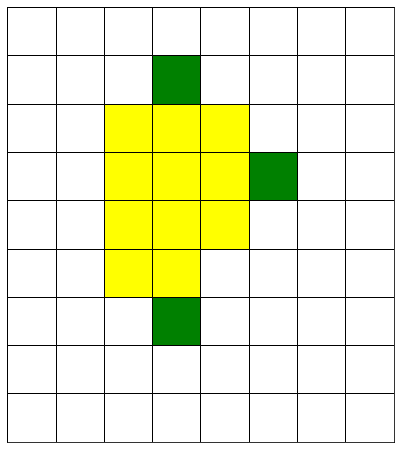

In [299]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_grid(width, height):
    grid = [['white' for _ in range(width)] for _ in range(height)]
    return grid

def add_black_box(grid):
    total_room = random.randint(14, 20)
    room = []
    x = 4
    y = 3

    if 0 <= x < len(grid[0]) and 0 <= y < len(grid):
        room.append((y, x))

        while len(room) < total_room:
            temp_room = []
            for i in range(len(room)):
                x, y = room[i]
                neighbor_tuple = (x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)
                temp_room.extend(neighbor_tuple)

            # Remove coordinates with negative values and those outside the grid's boundaries
            temp_room = [(x, y) for x, y in temp_room if 0 <= x < len(grid[0]) and 0 <= y < len(grid)]

            if not temp_room:
                break

            temp_x, temp_y = random.choice(temp_room)  # Use different variable names for the coordinates
            if (temp_x, temp_y) in room:
                temp_room.remove((temp_x, temp_y))
            elif random.random() < 0.5:
                temp_room.remove((temp_x, temp_y))
            else:
                room.append((temp_x, temp_y))  # Append the new room with different coordinates

        # Identify rooms with only one neighbor and color them green
    
                    

    return count_n(room)

def count_n(room):
    one_Room = []
    # print(room)
    for count in room:
            x, y = count
            total_neightbor = 0
            counting = []
            neighbor_tuple = (x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)
            counting.extend(neighbor_tuple)
            # print(counting)
            for neighbor_x, neighbor_y in counting:  # Use different variable names for the loop
                if (neighbor_x, neighbor_y) in room:
                    total_neightbor += 1
            # print(count, "total nei", total_neightbor)  
            if total_neightbor == 1:
                one_Room.append(count)

            # one_Room = [x for x in one_Room if x in room]
    return room,one_Room


def display_grid(grid):
    fig, ax = plt.subplots(figsize=(8, 8))
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            color = grid[y][x]
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

    ax.set_xticks(range(len(grid[0])+1), minor=False)
    ax.set_yticks(range(len(grid)+1), minor=False)
    ax.grid(which='minor', color='black', linewidth=2)
    ax.tick_params(which='both', length=0)

    ax.set_aspect('equal')  # Set the aspect ratio to 'equal' for uniform cell size

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.show()

grid_width = 8
grid_height = 9
grid = create_grid(grid_width, grid_height)

random_list, one_meig = add_black_box(grid)

print("more room ",random_list)
print("one room ", one_meig)

for i in random_list:
    x, y = i
    if (i == 0) :
        print(i)
        grid[y][x] = "black"
    else :
        grid[y][x] = "yellow"

for t in one_meig:
    x, y = t
    grid[y][x] = "green"

display_grid(grid)